# DEPENDENCIES

In [2]:
import polars as pl

from data.cons_data import get_cons
from data.market_data import market_data
from data.market_data import market_hours
from pairs_finding.pairs_identification import cointegration_pairs
from pairs_finding.clustering import Clustering

import warnings

warnings.filterwarnings("ignore")

In [3]:
data = market_data(
    file_path="C:/Users/edmun/OneDrive/Desktop/Quantitative Trading Strategies/Project/qts/data/*.parquet"
)

In [7]:
df = data.read(cons=['TSLA'], start='2017-01-01', end='2024-12-01')

<Axes: >

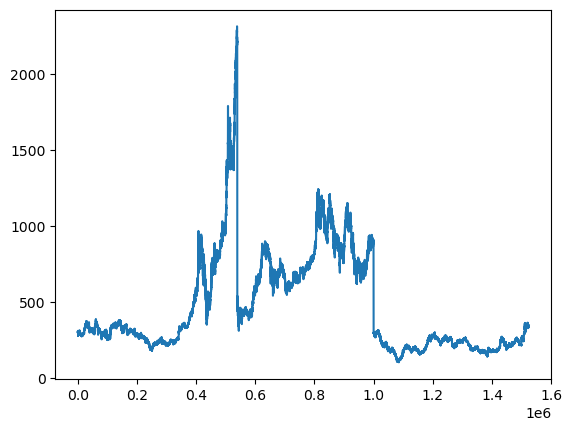

In [10]:
data.df.to_pandas()['TSLA'].plot()

# CONSTITUENT DATA

In [14]:
etf = "QQQ"

cons = get_cons(etf=etf)

In [15]:
cons_date = cons.read()
cons_date["2024-09-30"]

['AAPL',
 'ABNB',
 'ADBE',
 'ADI',
 'ADP',
 'ADSK',
 'AEP',
 'AMAT',
 'AMD',
 'AMGN',
 'AMZN',
 'ANSS',
 'ARM',
 'ASML',
 'AVGO',
 'AZN',
 'BIIB',
 'BKNG',
 'BKR',
 'CCEP',
 'CDNS',
 'CDW',
 'CEG',
 'CHTR',
 'CMCSA',
 'COST',
 'CPRT',
 'CRWD',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTSH',
 'DASH',
 'DDOG',
 'DLTR',
 'DXCM',
 'EA',
 'EXC',
 'FANG',
 'FAST',
 'FTNT',
 'GEHC',
 'GFS',
 'GILD',
 'GOOG',
 'GOOGL',
 'HON',
 'IDXX',
 'ILMN',
 'INTC',
 'INTU',
 'ISRG',
 'KDP',
 'KHC',
 'KLAC',
 'LIN',
 'LRCX',
 'LULU',
 'MAR',
 'MCHP',
 'MDB',
 'MDLZ',
 'MELI',
 'META',
 'MNST',
 'MRNA',
 'MRVL',
 'MSFT',
 'MU',
 'NFLX',
 'NVDA',
 'NXPI',
 'ODFL',
 'ON',
 'ORLY',
 'PANW',
 'PAYX',
 'PCAR',
 'PDD',
 'PEP',
 'PYPL',
 'QCOM',
 'REGN',
 'ROP',
 'ROST',
 'SBUX',
 'SMCI.UW',
 'SNPS',
 'TEAM',
 'TMUS',
 'TSLA',
 'TTD',
 'TTWO',
 'TXN',
 'VRSK',
 'VRTX',
 'WBD',
 'WDAY',
 'XEL',
 'ZS']

# MARKET DATA

In [16]:
start = "2024-09-30"
end = "2024-12-31"

In [17]:
d = market_data(
    file_path="C:/Users/edmun/OneDrive/Desktop/Quantitative Trading Strategies/Project/qts/data/"
)

In [18]:
d.read(cons=cons_date[start], start=start, end=end)

True

In [9]:
d.df.group_by("date").len().to_pandas()["len"].value_counts()  # checking mins a day

len
960    40
900    25
Name: count, dtype: int64

In [25]:
len(d.df.select(['GOOG', 'ARM']).to_numpy())

60900

### RESAMPLING IF NEEDED

In [ ]:
resampled = d.resample_df(resample_freq="1h")
resampled.head()

time,date,GOOG,ARM,ASML,AMD,GOOGL,NFLX,META,INTC,MSFT,MU,TSLA,QCOM,AAPL,NVDA,PDD,AMZN,TTD,PEP,SBUX,CRWD,ADBE,PYPL,AVGO,SNPS,MRNA,MELI,AMGN,MDB,LIN,BKNG,CEG,WBD,ISRG,EA,MNST,…,DXCM,GILD,FANG,CMCSA,CSCO,DLTR,ADP,ZS,MCHP,ADI,KHC,HON,ORLY,MDLZ,ROST,TEAM,FTNT,ADSK,KDP,CCEP,REGN,ANSS,AEP,TTWO,XEL,GEHC,CPRT,PCAR,CTSH,VRTX,PAYX,CSGP,CDW,FAST,MAR,ROP,IDXX
time,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
09:00:00,2024-09-30,165.11,142.98,841.41,164.15,163.78,707.0,566.43,23.72,426.92,106.13,261.0,170.15,229.09,119.42,142.39,187.58,109.45,169.9,97.36,285.45,514.6,77.85,172.3,512.34,65.8,2061.25,323.39,269.53,479.2,4248.99,257.0,8.34,480.0,144.78,52.46,…,67.4,83.46,170.59,41.6,53.01,73.4,272.69,171.75,80.58,232.03,35.44,207.63,1146.82,74.2,151.56,161.08,77.25,270.01,37.53,79.18,1045.04,323.72,101.83,152.76,64.57,92.05,51.9,98.12,76.89,462.86,132.99,75.0,226.55,71.52,253.04,554.2,511.77
10:00:00,2024-09-30,165.26,142.31,844.1,162.4,163.81,706.11,567.34,23.62,427.28,105.6,261.33,168.83,230.15,119.16,141.34,187.56,109.45,170.5,97.48,283.81,513.99,77.86,170.62,511.76,66.0,2066.53,323.08,269.8,481.0,4248.99,258.16,8.34,480.0,144.78,52.46,…,67.4,83.52,170.59,41.6,53.01,73.4,273.8,171.45,80.58,229.51,35.37,207.63,1143.72,74.2,151.56,161.08,77.25,273.2,37.53,79.18,1040.4,323.72,101.83,152.76,64.57,92.05,51.9,98.12,76.89,464.46,132.99,75.0,226.55,71.52,253.04,554.2,511.77
11:00:00,2024-09-30,165.14,142.32,842.64,162.24,163.79,705.78,567.0,23.61,427.4,106.17,260.69,169.14,229.74,119.12,141.63,187.6,109.0,170.31,97.63,284.96,514.33,77.8,170.31,511.35,66.22,2065.25,324.97,268.79,481.01,4248.99,258.51,8.37,479.53,144.78,52.46,…,67.4,83.44,170.59,41.72,53.01,73.15,273.8,170.84,79.5,229.0,35.44,207.63,1144.51,74.2,151.56,161.08,77.52,274.46,37.53,79.18,1040.4,325.6,101.83,152.76,64.57,92.05,51.9,98.12,76.89,464.46,132.99,75.0,226.55,71.52,253.04,554.2,511.77
12:00:00,2024-09-30,164.64,140.77,837.92,160.62,163.36,704.67,564.71,23.36,426.79,105.86,258.91,168.03,229.55,117.95,141.0,186.36,108.94,170.47,97.71,283.85,514.25,77.43,169.67,508.48,65.8,2064.9,323.36,268.0,480.71,4250.0,255.0,8.35,478.0,144.86,52.5,…,67.5,83.46,170.4,41.67,53.0,73.15,273.97,171.18,79.18,227.82,35.41,207.3,1144.76,74.09,151.56,161.19,77.34,273.19,37.53,79.18,1041.58,325.0,101.84,152.65,64.57,92.14,51.9,98.12,76.89,464.46,132.99,75.25,225.22,71.52,253.04,552.5,511.8
13:00:00,2024-09-30,165.07,141.15,837.2,162.42,163.72,705.65,566.82,23.56,427.73,106.13,258.59,169.03,230.31,118.18,142.17,186.81,108.8,170.3,97.87,284.94,515.03,77.48,170.85,509.93,65.78,2060.56,322.67,268.0,480.98,4248.0,256.53,8.33,479.3,144.86,52.6,…,67.5,83.59,170.63,41.72,53.02,73.32,273.8,171.0,78.98,227.6,35.48,207.84,1144.76,74.09,151.91,160.5,77.33,275.0,37.53,79.25,1042.7,325.0,101.85,152.65,64.57,92.15,52.14,98.12,76.89,464.46,132.99,75.25,226.0,71.52,253.25,555.0,511.8


### Filter for pre market post

#### can also filter first then resample

In [ ]:
filtered_hours = d.filter_hours(hours=market_hours.MARKET)
filtered_hours.head()

date,min_time,max_time,time,GOOG,ARM,ASML,AMD,GOOGL,NFLX,META,INTC,MSFT,MU,TSLA,QCOM,AAPL,NVDA,PDD,AMZN,TTD,PEP,SBUX,CRWD,ADBE,PYPL,AVGO,SNPS,MRNA,MELI,AMGN,MDB,LIN,BKNG,CEG,WBD,ISRG,…,DXCM,GILD,FANG,CMCSA,CSCO,DLTR,ADP,ZS,MCHP,ADI,KHC,HON,ORLY,MDLZ,ROST,TEAM,FTNT,ADSK,KDP,CCEP,REGN,ANSS,AEP,TTWO,XEL,GEHC,CPRT,PCAR,CTSH,VRTX,PAYX,CSGP,CDW,FAST,MAR,ROP,IDXX
date,time,time,time,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2024-09-30,08:00:00,23:59:00,13:30:00,165.1,142.3,836.11,163.25,163.85,705.57,565.5,23.83,426.55,106.6,258.4,171.165,231.01,118.81,140.47,186.96,108.18,171.4,97.15,283.7,513.21,77.96,170.4,509.46,66.09,2056.73,321.46,267.0,479.37,4212.8,255.88,8.335,480.02,…,67.79,83.43,170.56,41.79,53.13,72.78,274.4,170.76,79.48,229.05,35.42,208.73,1155.41,74.27,152.14,160.86,77.875,273.21,37.79,79.6,1042.33,322.455,102.28,153.235,64.92,94.085,52.195,97.81,77.12,462.98,133.88,74.73,226.6,71.32,253.13,555.28,511.8
2024-09-30,08:00:00,23:59:00,13:31:00,165.83,143.08,839.6,163.69,164.52,705.455,565.49,23.87,428.01,106.25,260.95,171.99,231.98,119.46,140.45,186.92,108.16,171.27,96.86,283.9,513.89,77.9,171.22,512.05,65.8,2056.99,320.95,267.5,478.93,4202.345,256.06,8.285,482.5,…,68.04,83.22,170.12,41.71,52.95,72.95,273.73,170.58,79.59,230.0,35.35,208.09,1151.0,74.03,151.66,161.42,77.83,273.08,37.65,79.21,1042.33,322.455,102.13,153.55,64.58,93.17,52.23,97.98,77.155,463.13,133.7,74.54,226.6,71.32,251.86,555.28,511.8
2024-09-30,08:00:00,23:59:00,13:32:00,166.41,143.13,838.3,163.4,165.12,706.34,567.25,23.83,428.56,105.92,261.29,171.0,231.69,119.39,139.14,187.715,108.25,171.43,96.96,283.71,513.97,77.97,170.88,511.75,65.72,2062.24,319.9,268.03,478.45,4195.96,254.39,8.19,482.3,…,67.93,83.45,170.11,41.8,52.8,72.39,273.73,171.395,79.66,229.49,35.265,207.85,1150.52,74.05,151.66,161.2,77.4,273.66,37.58,79.28,1042.33,322.455,102.13,153.55,64.47,93.1,52.23,97.37,77.12,464.4,133.58,74.65,226.6,71.16,251.57,555.28,512.25
2024-09-30,08:00:00,23:59:00,13:33:00,166.275,143.1,839.1,163.13,165.01,706.82,567.3,23.82,429.1,105.82,261.3,170.93,232.27,119.47,138.51,187.36,108.18,171.21,96.98,284.28,514.78,77.975,171.095,511.05,65.675,2062.14,319.89,268.17,478.39,4210.75,254.55,8.175,482.4,…,67.62,83.41,170.14,41.76,52.77,72.1,273.01,171.71,79.78,229.61,35.27,207.75,1149.7,74.08,151.5,160.77,77.35,273.72,37.63,79.4,1042.21,323.76,101.72,154.24,64.41,93.17,52.09,97.55,77.17,465.085,133.02,74.835,226.6,71.18,251.5,553.96,511.59
2024-09-30,08:00:00,23:59:00,13:34:00,166.15,142.57,838.98,162.87,164.88,706.75,567.25,23.71,428.685,105.58,262.35,170.09,232.31,119.61,139.53,187.33,108.49,170.99,97.15,283.8,514.63,77.75,171.02,510.945,65.78,2059.65,319.57,268.2,477.88,4210.95,252.5,8.19,483.24,…,67.66,83.37,170.12,41.72,52.82,72.22,273.17,171.59,79.98,229.425,35.26,207.68,1147.85,74.14,151.67,160.82,77.51,273.87,37.59,79.4,1042.21,323.0,101.54,154.3,64.505,93.26,52.06,97.44,76.87,466.97,133.02,74.825,226.6,71.035,251.5,552.35,511.38


# Clustering

In [61]:
c = Clustering(df=resampled.select(pl.all().exclude(["date", "time"])))

### kmeans

In [62]:
c.run_clustering(method="kmeans", min_clusters=5, max_clusters=20)

1


In [63]:
c.cluster_pairs

{2: ['GOOG',
  'GOOGL',
  'NFLX',
  'META',
  'AAPL',
  'NVDA',
  'AMZN',
  'TTD',
  'CRWD',
  'PYPL',
  'BKNG',
  'ISRG',
  'EA',
  'MNST',
  'ABNB',
  'WDAY',
  'CDNS',
  'CHTR',
  'VRSK',
  'COST',
  'INTU',
  'DASH',
  'TMUS',
  'BKR',
  'ILMN',
  'GFS',
  'DXCM',
  'GILD',
  'CSCO',
  'DLTR',
  'ADP',
  'ZS',
  'HON',
  'ORLY',
  'ROST',
  'ADSK',
  'ANSS',
  'TTWO',
  'XEL',
  'CPRT',
  'PCAR',
  'CTSH',
  'PAYX',
  'FAST',
  'MAR'],
 0: ['ARM',
  'ASML',
  'AMD',
  'INTC',
  'MU',
  'PDD',
  'MRNA',
  'MELI',
  'AMGN',
  'MDB',
  'CEG',
  'BIIB',
  'NXPI',
  'AMAT',
  'ON',
  'KLAC',
  'MCHP',
  'REGN',
  'VRTX',
  'CDW',
  'IDXX'],
 3: ['MSFT',
  'QCOM',
  'PEP',
  'SBUX',
  'ADBE',
  'SNPS',
  'LIN',
  'AZN',
  'CTAS',
  'CSX',
  'ODFL',
  'EXC',
  'TXN',
  'FANG',
  'CMCSA',
  'ADI',
  'KHC',
  'MDLZ',
  'KDP',
  'CCEP',
  'AEP',
  'GEHC',
  'CSGP',
  'ROP'],
 5: ['TSLA', 'AVGO', 'WBD', 'MRVL', 'LULU', 'DDOG', 'TEAM', 'FTNT'],
 1: ['LRCX'],
 4: ['PANW']}

### agnes

In [64]:
c.run_clustering(method="agnes", min_clusters=5, max_clusters=20)

3


In [65]:
c.cluster_pairs

{6: ['GOOG',
  'GOOGL',
  'NFLX',
  'NVDA',
  'AMZN',
  'CRWD',
  'BKNG',
  'DDOG',
  'DASH',
  'DXCM',
  'FTNT',
  'TTWO'],
 2: ['ARM',
  'ASML',
  'AMD',
  'INTC',
  'MU',
  'MELI',
  'AMGN',
  'MDB',
  'CEG',
  'BIIB',
  'NXPI',
  'AMAT',
  'ON',
  'KLAC',
  'MCHP',
  'REGN',
  'VRTX',
  'CDW',
  'IDXX'],
 0: ['META',
  'AAPL',
  'TTD',
  'PYPL',
  'ISRG',
  'MNST',
  'ABNB',
  'WDAY',
  'CDNS',
  'CHTR',
  'VRSK',
  'COST',
  'INTU',
  'TMUS',
  'BKR',
  'ILMN',
  'GFS',
  'GILD',
  'CSCO',
  'DLTR',
  'ADP',
  'ZS',
  'HON',
  'ORLY',
  'ROST',
  'ADSK',
  'ANSS',
  'XEL',
  'CPRT',
  'PCAR',
  'CTSH',
  'PAYX',
  'CSGP',
  'FAST',
  'MAR'],
 5: ['MSFT',
  'QCOM',
  'PEP',
  'SBUX',
  'ADBE',
  'SNPS',
  'LIN',
  'EA',
  'AZN',
  'CTAS',
  'CSX',
  'ODFL',
  'EXC',
  'TXN',
  'FANG',
  'CMCSA',
  'ADI',
  'KHC',
  'MDLZ',
  'KDP',
  'CCEP',
  'AEP',
  'GEHC',
  'ROP'],
 1: ['TSLA', 'AVGO', 'WBD', 'MRVL', 'LULU', 'TEAM'],
 3: ['PDD', 'MRNA'],
 7: ['LRCX'],
 4: ['PANW']}

### dbscan (this like doesnt work)

In [66]:
c.run_clustering(method="dbscan", eps_values=[1, 3, 100], min_samples_values=[1, 3, 5])

In [67]:
c.cluster_pairs

{0: ['GOOG',
  'ARM',
  'ASML',
  'AMD',
  'GOOGL',
  'NFLX',
  'META',
  'INTC',
  'MSFT',
  'MU',
  'TSLA',
  'QCOM',
  'AAPL',
  'NVDA',
  'PDD',
  'AMZN',
  'TTD',
  'PEP',
  'SBUX',
  'CRWD',
  'ADBE',
  'PYPL',
  'AVGO',
  'SNPS',
  'MRNA',
  'MELI',
  'AMGN',
  'MDB',
  'LIN',
  'BKNG',
  'CEG',
  'WBD',
  'ISRG',
  'EA',
  'MNST',
  'AZN',
  'ABNB',
  'MRVL',
  'WDAY',
  'CTAS',
  'CDNS',
  'CSX',
  'CHTR',
  'ODFL',
  'EXC',
  'VRSK',
  'BIIB',
  'NXPI',
  'COST',
  'LULU',
  'TXN',
  'INTU',
  'DDOG',
  'DASH',
  'TMUS',
  'BKR',
  'AMAT',
  'ILMN',
  'GFS',
  'ON',
  'KLAC',
  'PANW',
  'DXCM',
  'GILD',
  'FANG',
  'CMCSA',
  'CSCO',
  'DLTR',
  'ADP',
  'ZS',
  'MCHP',
  'ADI',
  'KHC',
  'HON',
  'ORLY',
  'MDLZ',
  'ROST',
  'TEAM',
  'FTNT',
  'ADSK',
  'KDP',
  'CCEP',
  'REGN',
  'ANSS',
  'AEP',
  'TTWO',
  'XEL',
  'GEHC',
  'CPRT',
  'PCAR',
  'CTSH',
  'VRTX',
  'PAYX',
  'CSGP',
  'CDW',
  'FAST',
  'MAR',
  'ROP',
  'IDXX'],
 1: ['LRCX']}

### affinity prop

In [68]:
c.run_clustering(
    method="affinity_propagation",
    damping=0.9,
    max_iter=200,
    convergence_iter=15,
)

In [69]:
c.cluster_pairs

{1: ['GOOG',
  'ARM',
  'ASML',
  'AMD',
  'GOOGL',
  'NFLX',
  'META',
  'INTC',
  'MSFT',
  'MU',
  'TSLA',
  'QCOM',
  'AAPL',
  'NVDA',
  'PDD',
  'AMZN',
  'TTD',
  'PEP',
  'SBUX',
  'CRWD',
  'ADBE',
  'PYPL',
  'AVGO',
  'SNPS',
  'MRNA',
  'MELI',
  'AMGN',
  'MDB',
  'LIN',
  'BKNG',
  'CEG',
  'WBD',
  'ISRG',
  'EA',
  'MNST',
  'AZN',
  'ABNB',
  'MRVL',
  'WDAY',
  'CTAS',
  'CDNS',
  'CSX',
  'CHTR',
  'ODFL',
  'EXC',
  'VRSK',
  'BIIB',
  'NXPI',
  'COST',
  'LULU',
  'TXN',
  'INTU',
  'DDOG',
  'DASH',
  'TMUS',
  'BKR',
  'AMAT',
  'ILMN',
  'GFS',
  'ON',
  'KLAC',
  'PANW',
  'DXCM',
  'GILD',
  'FANG',
  'CMCSA',
  'CSCO',
  'DLTR',
  'ADP',
  'ZS',
  'MCHP',
  'ADI',
  'KHC',
  'HON',
  'ORLY',
  'MDLZ',
  'ROST',
  'TEAM',
  'FTNT',
  'ADSK',
  'KDP',
  'CCEP',
  'REGN',
  'ANSS',
  'AEP',
  'TTWO',
  'XEL',
  'GEHC',
  'CPRT',
  'PCAR',
  'CTSH',
  'VRTX',
  'PAYX',
  'CSGP',
  'CDW',
  'FAST',
  'MAR',
  'ROP',
  'IDXX'],
 0: ['LRCX']}

# COINTEGRATION

In [ ]:
# use KMEANS
c.run_clustering(method="agnes", min_clusters=5, max_clusters=20)

3


In [71]:
find_pairs = cointegration_pairs(
    df=resampled.select(pl.all().exclude(["date", "time"])),
    p_val_cutoff=0.05,
    cluster_pairs=c.cluster_pairs,
)

In [72]:
find_pairs.identify_pairs()

In [73]:
find_pairs.pairs

{('GOOG', 'GOOGL'): -3.5814670649348286,
 ('DDOG', 'DXCM'): -2.8669970788923793,
 ('BKNG', 'DASH'): -3.6743574368936307,
 ('NFLX', 'CRWD'): -3.2063072817004348,
 ('CRWD', 'DXCM'): -2.930356027807073,
 ('BKNG', 'TTWO'): -3.141429564723962,
 ('CRWD', 'FTNT'): -3.628122305945294,
 ('NFLX', 'DXCM'): -3.523022959534889,
 ('AMZN', 'CEG'): -2.869218221597542,
 ('INTC', 'META'): -3.098414553592758,
 ('AMD', 'IDXX'): -3.35919374168457,
 ('GOOG', 'MELI'): -3.8554216658036204,
 ('AMZN', 'NXPI'): -3.3645145160925396,
 ('ARM', 'IDXX'): -3.140618811166845,
 ('AMZN', 'AMAT'): -2.983834706271915,
 ('NFLX', 'BIIB'): -2.9027069168710415,
 ('AMZN', 'ON'): -3.107794791357866,
 ('GOOG', 'CEG'): -3.124401977923805,
 ('NFLX', 'AMAT'): -3.3285255073497995,
 ('AMZN', 'MCHP'): -3.0993597162632867,
 ('GOOG', 'NXPI'): -3.2715300910507152,
 ('BKNG', 'IDXX'): -2.8809170687621037,
 ('GOOG', 'ON'): -3.1902015462017914,
 ('ASML', 'IDXX'): -2.9874935728612755,
 ('DXCM', 'AMAT'): -3.494045246175811,
 ('DXCM', 'ON'): -3.

In [74]:
trade_this = find_pairs.get_top_pairs(n=10)

In [75]:
trade_this

[('BKNG', 'DASH'),
 ('CRWD', 'FTNT'),
 ('GOOG', 'GOOGL'),
 ('NFLX', 'DXCM'),
 ('NFLX', 'CRWD'),
 ('BKNG', 'TTWO'),
 ('CRWD', 'DXCM'),
 ('DDOG', 'DXCM'),
 ('AMD', 'IDXX'),
 ('ARM', 'IDXX'),
 ('ASML', 'IDXX')]